Explore Composition of Microbial Community
> By Gati Aher  
> Sept 17, 2021

**Dataset:** FCF Carbon Perturbation (Cellulose-Glucose-Malate)

**Goal:** Exploratory/Composition Analysis

In [24]:
# imports
import skbio
import pandas as pd
import numpy as np
from scipy import stats
import re

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

# Import Data

* Sample Name x Meta Information
    * sample_annotations.csv
* OTU ID x Sample ID x Absolute Counts
    * OTU_counts.csv
* OTU ID x Taxonomy, Functions
    * OTU_properties.csv
* OTU Phylogentic Tree
    * MUSCLE_alignment_ML_tree_all_OTUs

In [3]:
sample_annotations = pd.read_csv("data/processed/sample_annotations.csv", index_col=0)
sample_annotations

,group,series,carbon,transfer,day,replicate
sampleID,,,,,,
sC0C,C0C,C0C,C,C0C,C0C,C0C
s1C3A,g1C,sC,C,t1,d3,rA
s1C3B,g1C,sC,C,t1,d3,rB
s1C5A,g1C,sC,C,t1,d5,rA
s1C5B,g1C,sC,C,t1,d5,rB
...,...,...,...,...,...,...
s3G7A,g3G,sG,C,t3,d7,rA
s3G7B,g3G,sG,C,t3,d7,rB
s3G7C,g3G,sG,C,t3,d7,rC


In [4]:
OTU_counts = pd.read_csv("data/processed/OTU_counts.csv", index_col=0)
OTU_counts

,sC0C,s1C3A,s1C3B,s1G3A,s1G3B,s1G3C,s1M3A,s1M3B,s1M3C,s1M5C,...,s3M7A,s3M7B,s3M7C,s3M10A,s3M10B,s3M10C,s3G10A,s3G10B,s2M10A,s2M10C
otu name,,,,,,,,,,,,,,,,,,,,,
OTU_1,6,11,13,20,18,30,59,94,36,89,...,2,4,11,19,25,22,16,16,5,4
OTU_2,17546,18302,32674,9700,4428,12766,1179,2121,1224,2216,...,22189,11996,31216,17838,12257,19679,16779,15614,42046,56298
OTU_3,3169,3033,4495,3455,2142,2717,756,1293,714,530,...,2374,1785,1073,4207,1275,2274,4900,2027,3192,2086
OTU_4,5243,3526,4658,29020,18697,29632,3724,5802,3281,6647,...,13616,24846,17928,19104,11308,11368,26958,15939,30080,23869
OTU_5,3809,1128,1313,1001,758,999,608,736,360,309,...,29340,12847,17129,22577,7156,26149,9243,2211,13865,5190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OTU_639,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU_640,4270,2662,3657,3324,1628,2206,554,1165,625,314,...,860,1432,676,1643,919,1075,1442,684,12646,4751
OTU_641,0,0,0,1,4,8,2,2,1,3,...,3,6,2,3,1,2,4,1,6,1


In [5]:
OTU_properties = pd.read_csv("data/processed/OTU_properties.csv", index_col=0)
OTU_properties

,Name,kingdom,phylum,class,order,family,genus,species,superkingdom,taxonomy,superphylum,subclass,suborder,subphylum
otu name,,,,,,,,,,,,,,
OTU_1,eu528231.1 seasonal dynamics mudflat mouth maj...,bacteria,proteobacteria,alphaproteobacteria,rhodospirillales,rhodospirillaceae,magnetospirillum,magnetospirillum sp.,bacteria,Root;k__bacteria;p__proteobacteria;c__alphapro...,NaN,NaN,NaN,NaN
OTU_2,uncultured opitutus sp.,bacteria,verrucomicrobia,opitutae,opitutales,opitutaceae,opitutus,opitutus spp.,bacteria,Root;k__bacteria;p__verrucomicrobia;c__opituta...,chlamydiae/verrucomicrobia group,NaN,NaN,NaN
OTU_3,rhodopseudomonas palustris,bacteria,proteobacteria,alphaproteobacteria,rhizobiales,bradyrhizobiaceae,rhodopseudomonas,rhodopseudomonas palustris,bacteria,Root;k__bacteria;p__proteobacteria;c__alphapro...,NaN,NaN,NaN,NaN
OTU_4,ay297802.1 waterlogged archaeological wood clo...,bacteria,proteobacteria,alphaproteobacteria,rhizobiales,methylocystaceae,pleomorphomonas,pleomorphomonas oryzae,bacteria,Root;k__bacteria;p__proteobacteria;c__alphapro...,NaN,NaN,NaN,NaN
OTU_5,rhodoblastus acidophilus,bacteria,proteobacteria,alphaproteobacteria,rhizobiales,bradyrhizobiaceae,rhodoblastus,rhodoblastus acidophilus,bacteria,Root;k__bacteria;p__proteobacteria;c__alphapro...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OTU_639,uncultured spirochaeta sp.,bacteria,spirochaetes,spirochaetia,spirochaetales,spirochaetaceae,spirochaeta,spirochaeta spp.,bacteria,Root;k__bacteria;p__spirochaetes;c__spirochaet...,NaN,NaN,NaN,NaN
OTU_640,ab079679.1 rhodopseudomonas sp. hmd89,bacteria,proteobacteria,alphaproteobacteria,rhizobiales,bradyrhizobiaceae,afipia,afipia sp.,bacteria,Root;k__bacteria;p__proteobacteria;c__alphapro...,NaN,NaN,NaN,NaN
OTU_641,ay297803.1 waterlogged archaeological wood clo...,bacteria,proteobacteria,alphaproteobacteria,rhizobiales,methylocystaceae,pleomorphomonas,pleomorphomonas oryzae,bacteria,Root;k__bacteria;p__proteobacteria;c__alphapro...,NaN,NaN,NaN,NaN


In [6]:
# import phylogenetic weights and use in an example
from skbio import TreeNode
tree_file = open("data/raw/MUSCLE_alignment_ML_tree_all_OTUs", "r")
tree = TreeNode.read(tree_file)
tree_rooted = tree.root_at_midpoint()
print(str(tree)[:50], "...")

(((((((((((((((((((((((((((((((((((((((OTU_199:0.0 ...


# Noramlization to Dealing with HTS Unequal Sampling Depth


"The interpretation of counts of 0 is not straightforward, since they may represent the true absence of an OTU or its presence under the detection limit. Moreover, due to e.g., differences in yields between sequencing runs, and unequal representation of samples in pooled sequencing libraries, detection limits will vary between samples... This unequal sampling depth makes it often necessary to conduct some kind of normalization." [(Analysing Microbial Community Composition through Amplicon Sequencing: From Sampling to Hypothesis Testing, Hugerth and Andersson, 2017)](https://www.frontiersin.org/articles/10.3389/fmicb.2017.01561/full)


"It is critical to normalize the data to eliminate any bias due to differences in the sampling fractions. Thus, the primary objective of normalization is to transform the observed data so that expected differences in the mean absolute abundances between two ecosystems is not confounded by the differences in the sampling fractions. Failure to normalize the data will result in a systematic bias that increases the false discovery rate (FDR) and also possible loss of power in some cases." [(Analysis of microbial compositions: a review of normalization and differential abundance analysis, Lin and Peddada 2020)](https://www.nature.com/articles/s41522-020-00160-w/tables/1)


## Method 1: Relative Abundance

"One of the most popular approaches is to divide the counts by the total count of the sample. Doing this breaks the independence of observations, since an increase in the relative abundance of one OTU induces a perceived reduction in all others. A similar approach is using not the total count of reads for normalization, but a fixed percentile of them (Bullard et al., 2010), which should be less sensitive to events such as blooms." [(Analysing Microbial Community Composition through Amplicon Sequencing: From Sampling to Hypothesis Testing, Hugerth and Andersson, 2017)](https://www.frontiersin.org/articles/10.3389/fmicb.2017.01561/full)

"Relative abundance: The fraction of the taxon observed in the feature table relative to the sum of all taxa in the sample. It is between 0 and 1... Total-Sum Scaling (TSS) which simply transforms the abundance table (feature table) into relative abundance table, i.e. scale by each sample’s library size... TSS is known to have a bias in differential abundance estimates33,39,42,47 since a few preferentially sampled measurements (e.g. taxa, genes) will have an undue influence on the relative abundance data. Change in the abundance of a single taxon can alter the relative abundances of all taxa. Generally, the FDR generated from TSS-based analyses is unacceptably large." [(Analysis of microbial compositions: a review of normalization and differential abundance analysis, Lin and Peddada 2020)](https://www.nature.com/articles/s41522-020-00160-w/tables/1)

In [20]:
# calculate relative abundances
OTU_counts_rel = OTU_counts.div(OTU_counts.values.sum(axis=0), axis=1)

# # save relative abundance
# OTU_counts_rel.to_csv("data/processed/OTU_counts_rel.csv")
OTU_counts_rel.head()

,sC0C,s1C3A,s1C3B,s1G3A,s1G3B,s1G3C,s1M3A,s1M3B,s1M3C,s1M5C,...,s3M7A,s3M7B,s3M7C,s3M10A,s3M10B,s3M10C,s3G10A,s3G10B,s2M10A,s2M10C
otu name,,,,,,,,,,,,,,,,,,,,,
OTU_1,0.000068,0.000153,0.000111,0.000190,0.000244,0.000295,0.000545,0.000778,0.000463,0.000815,...,0.000017,0.000030,0.000066,0.000124,0.000246,0.000159,0.000085,0.000119,0.000030,0.000032
OTU_2,0.199079,0.253979,0.277887,0.092192,0.059906,0.125372,0.010886,0.017560,0.015737,0.020294,...,0.194085,0.090046,0.188621,0.116022,0.120447,0.142650,0.089075,0.115759,0.251030,0.450236
OTU_3,0.035956,0.042089,0.038229,0.032838,0.028979,0.026683,0.006980,0.010705,0.009180,0.004854,...,0.020765,0.013399,0.006484,0.027363,0.012529,0.016484,0.026013,0.015028,0.019057,0.016683
OTU_4,0.059488,0.048931,0.039616,0.275816,0.252949,0.291009,0.034383,0.048035,0.042183,0.060873,...,0.119098,0.186502,0.108329,0.124256,0.111121,0.082405,0.143112,0.118168,0.179589,0.190889
OTU_5,0.043217,0.015653,0.011167,0.009514,0.010255,0.009811,0.005614,0.006093,0.004628,0.002830,...,0.256635,0.096434,0.103501,0.146845,0.070320,0.189550,0.049068,0.016392,0.082779,0.041506


In [22]:
# check that relative abundances for OTUs in sample sum to 1
OTU_counts_rel.sum(axis=0)

sC0C      1.0
s1C3A     1.0
s1C3B     1.0
s1G3A     1.0
s1G3B     1.0
         ... 
s3M10C    1.0
s3G10A    1.0
s3G10B    1.0
s2M10A    1.0
s2M10C    1.0
Length: 86, dtype: float64

In [23]:
# count how many OTUs have non-negligible relative count (make up more than 1% of sample)
threshold_min_rel_count = 0.01 # if only keep OTUs with relative count greater than this
((OTU_counts_rel * ((OTU_counts_rel > threshold_min_rel_count).astype(int))).sum(axis=1) == 0).sum()

624

## Method 2: Log-Ratio Based Methods

"As an alternative to the above class of methods, several methods have been proposed in the literature that are inspired by Aitchison’s methodology for compositional data. These methods do not explicitly perform normalization such as the ones described above, since they convert the observed abundances to log-ratios within each sample. Thus, within each sample, by taking log-ratios of all taxa with respect to some common reference taxon or some suitable function of all taxa, these methods are intrinsically eliminating the effect of the sampling fraction... To avoid the above challenges due to alr transformation, rather than using a pre-specified taxon as the reference taxon, one may consider the center of mass of all taxa as the reference. Thus, within each sample, for each taxon, the log-ratios are computed relative to the geometric mean of all taxa. This transformation is called the clr transformation."[(Analysis of microbial compositions: a review of normalization and differential abundance analysis, Lin and Peddada 2020)](https://www.nature.com/articles/s41522-020-00160-w/tables/1)

"G(x) is the geometric mean of x... The G(x) cannot be determined for sparse data without deleting, replacing or estimating the 0 count values. Fortunately, there are acceptable methods of dealing with 0 count values as both point estimates using zCompositionsR package (Palarea-Albaladejo and Martín-Fernández, 2015), and as a probability distribution using ALDEx2 available on Bioconductor. Converting the single estimate to a probability vector prior to clr transformation produces a scale-invariant measure since this accounts for the precision of the estimate of the probabilities for each feature; we refer advanced readers to the more technical literature (Jaynes and Bretthorst, 2003; Fernandes et al., 2013; Gloor et al., 2016a) and the “Probability” section of the Supplement for more information."[(Microbiome Datasets Are Compositional: And This Is Not Optional, Gloor, Macklaim, Pawlowsky-Clahn, Egozcue)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5695134/)



In [30]:
stats.gmean(OTU_counts, axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

# Set Up Consistent Styling

*Key:*
- Shape indicates current carbon source
- Color indicates carbon series
- Marker Edge Width indicates day
- Marker Color indicates transfer series

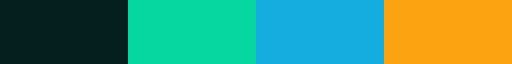

In [8]:
map_carbon_shapes = {
    "C0C": "o",
    "C": "o",
    "G": "s",
    "M": "^",
}

def_marker_size = 10

def_color = "#041F1E"
def_line_color = "#707070"

colors = [
    "#041F1E", # original community 
    "#06D6A0", # cellulose
    "#15ADE0", # glucose
    "#FCA311", # malate
]
map_carbon_colors = {
    "C0C": colors[0],
    "C": colors[1],
    "G": colors[2],
    "M": colors[3],
}
cmap = ListedColormap(colors, name="carbon")
cmap

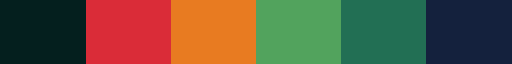

In [9]:
map_days_widths = {
    "C0C": 0,
    "3": 1,
    "5": 2,
    "7": 3,
    "10": 4,
    "20": 5,
}

colors_days = [
    "#041F1E", # C0C
    "#DA2C38", # 3
    "#E87B21", # 5
    "#52A35D", # 7
    "#226F54", # 10
    "#14213d", # 20
]

map_days_colors = {
    "C0C": colors_days[0], 
    "3": colors_days[1],
    "5": colors_days[2],
    "7": colors_days[3],
    "10": colors_days[4],
    "20": colors_days[5],
}

cmap_days = ListedColormap(colors_days, name="days")
cmap_days

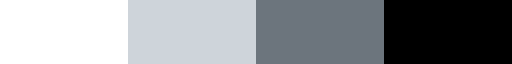

In [10]:
colors_transfers = [
    "#FFFFFF", # C0
    "#ced4da", # 1
    "#6c757d", # 2
    "#000000", # 3
]

map_transfers_colors = {
    "C0C": colors_transfers[0],
    "1": colors_transfers[1],
    "2": colors_transfers[2],
    "3": colors_transfers[3],
}

cmap_transfers = ListedColormap(colors_transfers, name="transfers")
cmap_transfers

---
* Question: How diverse is each sample?
* Method: Alpha Diversity Analysis
* Normalization: use relative_abundance_matrix_{}.csv
* Result: alpha_diversity_xxx.csv
* Visual: (in R, by grouping factor, with Tukey HSD annotated)
    * Diversity
    * Richness
    * Faith’s PD

In [11]:
from skbio.diversity import alpha_diversity

In [67]:
# perform alpha diversity on absolute counts
df_alpha_diversity_abs = pd.DataFrame()
# df_alpha_diversity["ace"] = alpha_diversity(metric="ace", counts=OTU_counts_rel_int.values, ids=OTU_counts_rel_int.index, validate=True)
df_alpha_diversity_abs["chao1"] = alpha_diversity(metric="chao1", counts=OTU_counts.values.T, ids=OTU_counts.columns, validate=True)
df_alpha_diversity_abs["shannon"] = alpha_diversity(metric="shannon", counts=OTU_counts.values.T, ids=OTU_counts.columns, validate=True)
df_alpha_diversity_abs["simpson"] = alpha_diversity(metric="simpson", counts=OTU_counts.values.T, ids=OTU_counts.columns, validate=True)
df_alpha_diversity_abs["simpson_e"] = alpha_diversity(metric="simpson_e", counts=OTU_counts.values.T, ids=OTU_counts.columns, validate=True)
df_alpha_diversity_abs["faith_pd"] = alpha_diversity(metric="faith_pd", counts=OTU_counts.values.T, ids=OTU_counts.columns, tree=tree_rooted, otu_ids=[n.name for n in tree.tips()], validate=True)
# save to R for statistical analysis
df_alpha_diversity_abs.to_csv("data/processed/alpha_diversity_abs.csv", index_label="sampleID")
df_alpha_diversity_abs = df_alpha_diversity_abs.join(sample_annotations)
df_alpha_diversity_abs

,chao1,shannon,simpson,simpson_e,faith_pd,group,series,carbon,transfer,day,replicate
sC0C,357.781250,3.799761,0.891328,0.036228,16.932346,C0C,C0C,C,C0C,C0C,C0C
s1C3A,265.037037,3.364793,0.849692,0.034118,13.476526,g1C,sC,C,t1,d3,rA
s1C3B,301.088235,3.236191,0.832330,0.026158,15.686674,g1C,sC,C,t1,d3,rB
s1G3A,353.000000,3.188919,0.829219,0.025131,16.235350,g1G,sG,G,t1,d3,rA
s1G3B,287.840000,3.073363,0.817973,0.028318,14.072015,g1G,sG,G,t1,d3,rB
...,...,...,...,...,...,...,...,...,...,...,...
s3M10C,392.774194,3.560605,0.875798,0.028450,17.146181,g3M,sM,C,t3,d10,rC
s3G10A,442.500000,3.289984,0.818982,0.017878,18.436467,g3G,sG,C,t3,d10,rA
s3G10B,348.200000,3.267083,0.840444,0.023830,16.551006,g3G,sG,C,t3,d10,rB
s2M10A,384.840000,3.637787,0.868883,0.026209,18.311991,g2M,sM,C,t2,d10,rA


In [68]:
df_alpha_diversity_abs["shannon"].mean()

2.971697845683764

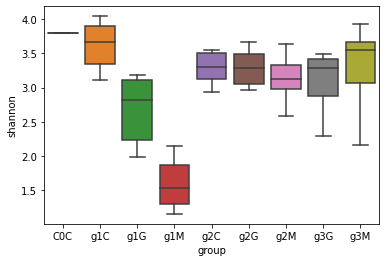

In [69]:
ax = sns.boxplot(x="group", y="shannon", data=df_alpha_diversity_abs)

In [80]:
# alpha diversity relative abundance counts need to be ints
OTU_counts_rel_int = pd.DataFrame()
for col in OTU_counts_rel.columns.values:
    OTU_counts_rel_int[col] = (OTU_counts_rel[col] * 100).astype('int64')
OTU_counts_rel_int

,sC0C,s1C3A,s1C3B,s1G3A,s1G3B,s1G3C,s1M3A,s1M3B,s1M3C,s1M5C,...,s3M7A,s3M7B,s3M7C,s3M10A,s3M10B,s3M10C,s3G10A,s3G10B,s2M10A,s2M10C
otu name,,,,,,,,,,,,,,,,,,,,,
OTU_1,0,0,0,1,0,1,3,4,1,4,...,0,0,0,0,1,1,0,0,0,0
OTU_2,1,1,2,0,0,0,0,0,0,0,...,1,0,2,1,0,1,1,1,3,4
OTU_3,1,1,2,1,1,1,0,0,0,0,...,1,0,0,2,0,1,2,1,1,1
OTU_4,0,0,0,2,1,2,0,0,0,0,...,0,1,1,1,0,0,1,1,2,1
OTU_5,0,0,0,0,0,0,0,0,0,0,...,5,2,3,4,1,4,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OTU_639,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU_640,2,1,2,2,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,7,2
OTU_641,0,0,0,0,1,3,0,0,0,1,...,1,2,0,1,0,0,1,0,2,0


In [81]:
df_alpha_diversity_rel = pd.DataFrame()
# df_alpha_diversity["ace"] = alpha_diversity(metric="ace", counts=OTU_counts_rel_int.values, ids=OTU_counts_rel_int.index, validate=True)
df_alpha_diversity_rel["chao1"] = alpha_diversity(metric="chao1", counts=OTU_counts_rel_int.values.T, ids=OTU_counts_rel_int.columns, validate=True)
df_alpha_diversity_rel["shannon"] = alpha_diversity(metric="shannon", counts=OTU_counts_rel_int.values.T, ids=OTU_counts_rel_int.columns, validate=True)
df_alpha_diversity_rel["simpson"] = alpha_diversity(metric="simpson", counts=OTU_counts_rel_int.values.T, ids=OTU_counts_rel_int.columns, validate=True)
df_alpha_diversity_rel["simpson_e"] = alpha_diversity(metric="simpson_e", counts=OTU_counts_rel_int.values.T, ids=OTU_counts_rel_int.columns, validate=True)
df_alpha_diversity_rel["faith_pd"] = alpha_diversity(metric="faith_pd", counts=OTU_counts_rel_int.values.T, ids=OTU_counts_rel_int.columns, tree=tree_rooted, otu_ids=[n.name for n in tree.tips()], validate=True)
# save to R for statistical analysis (ANOVA, Tukey HSD + plots)
df_alpha_diversity_rel.to_csv("data/processed/alpha_diversity_rel.csv", index_label="sampleID")
df_alpha_diversity_rel

,chao1,shannon,simpson,simpson_e,faith_pd
sC0C,193.384615,6.088562,0.975394,0.270940,12.995667
s1C3A,166.956522,5.832541,0.965988,0.294011,8.749692
s1C3B,142.763158,6.274117,0.979318,0.377751,11.665567
s1G3A,192.406250,6.333422,0.979020,0.326463,13.169687
s1G3B,169.153846,5.688752,0.966394,0.319967,8.534385
...,...,...,...,...,...
s3M10C,281.157895,6.815400,0.984450,0.303338,14.954442
s3G10A,306.521739,7.230898,0.990119,0.393774,16.798991
s3G10B,239.187500,6.864771,0.987051,0.424335,13.433071
s2M10A,261.454545,7.045476,0.988300,0.357605,16.487053


---
* Question: Which OTUs are in the dataset?
* Method: Explore Composition
* Normalization: None
* Result: relative_abundance_matrix_{}.csv
* Visual: sample_composition_stacked_bar_plots.png
* Goal: Identify high abundance members
* Goal: Identify low abundance members
* Goal: Identify who is not present in replicates
* Impact: Inform potential cleaning decisions

In [ ]:
# make stacked barchart in R

---
* Question: What are the gradients of change?
* Method: Beta Diversity Analysis
* Normalization: use relative_abundance_matrix_{}.csv
* Result: sample_diversity_PCoA.csv
* Visual: sample_diversity_PCoA_xxx.csv
    * Bray-Curtis
    * UniFrac
* Impact: expect that samples return to similar variance localization

* Question: Take a closer look at gradients of change?
* Method: Beta Diversity Analysis (within series)
* Result: sample_diversity_PCoA.csv
* Visual: sample_diversity_PCoA_xxx.csv
    * Bray-Curtis
    * UniFrac
* Impact: observe some notable time trends (PCoA)

* Question: How are the OTUs phylogenetically related and distributed?
* Normalization: None --format OTU name into tree
* Result: skbio.TreeNode
* Visual: tree_OTU_count_all_sample_dendrogram.img
* Goal: Pretty summary of distances
* Impact: Inform structure of dataset, inform merging decisions

In [18]:
# Get this from R metacoder